# image_samples.ipynb

Plots sample crop images.

Author: Connacher Murphy

In [1]:
# Import libraries
import os
import pandas as pd
import matplotlib.pyplot as plt
import cv2

In [2]:
# CCMT path
path = os.path.expanduser("~/data/ccmt/CCMT Dataset-Augmented")
print(os.listdir(path))

['Maize', 'Cassava', 'Tomato', 'Cashew']


In [3]:
# Compile file paths into a dataframe
crops = ["Maize"]  # just maize for now

crop_classes = {}
data = []

for crop in crops:
    # Loop through crop-specific classes
    crop_classes[crop] = os.listdir(os.path.join(path, crop, "train_set"))
    for crop_class in crop_classes[crop]:
        
        # Loop through images in each class
        for set in ["train_set", "test_set"]:
            for roots, dirs, files in os.walk(os.path.join(path, crop, set, crop_class)):
                for file in files:
                    data.append((crop, set, crop_class, os.path.join(crop, set, crop_class, file)))
        
print(data)
df = pd.DataFrame(data, columns=["crop", "set", "crop_class", "file"])

[('Maize', 'train_set', 'leaf beetle', 'Maize/train_set/leaf beetle/8maize_train_leaf beetle.JPG'), ('Maize', 'train_set', 'leaf beetle', 'Maize/train_set/leaf beetle/697maize_train_leaf beetle.JPG'), ('Maize', 'train_set', 'leaf beetle', 'Maize/train_set/leaf beetle/2925maize_train_leaf beetle.JPG'), ('Maize', 'train_set', 'leaf beetle', 'Maize/train_set/leaf beetle/1263maize_train_leaf beetle.JPG'), ('Maize', 'train_set', 'leaf beetle', 'Maize/train_set/leaf beetle/2595maize_train_leaf beetle.JPG'), ('Maize', 'train_set', 'leaf beetle', 'Maize/train_set/leaf beetle/3732maize_train_leaf beetle.JPG'), ('Maize', 'train_set', 'leaf beetle', 'Maize/train_set/leaf beetle/3652maize_train_leaf beetle.JPG'), ('Maize', 'train_set', 'leaf beetle', 'Maize/train_set/leaf beetle/260maize_train_leaf beetle.JPG'), ('Maize', 'train_set', 'leaf beetle', 'Maize/train_set/leaf beetle/2409maize_train_leaf beetle.JPG'), ('Maize', 'train_set', 'leaf beetle', 'Maize/train_set/leaf beetle/1747maize_train_lea

In [4]:
df  # list file path df

crop        set   crop_class  \
0      Maize  train_set  leaf beetle   
1      Maize  train_set  leaf beetle   
2      Maize  train_set  leaf beetle   
3      Maize  train_set  leaf beetle   
4      Maize  train_set  leaf beetle   
...      ...        ...          ...   
24546  Maize   test_set   grasshoper   
24547  Maize   test_set   grasshoper   
24548  Maize   test_set   grasshoper   
24549  Maize   test_set   grasshoper   
24550  Maize   test_set   grasshoper   

                                                    file  
0      Maize/train_set/leaf beetle/8maize_train_leaf ...  
1      Maize/train_set/leaf beetle/697maize_train_lea...  
2      Maize/train_set/leaf beetle/2925maize_train_le...  
3      Maize/train_set/leaf beetle/1263maize_train_le...  
4      Maize/train_set/leaf beetle/2595maize_train_le...  
...                                                  ...  
24546  Maize/test_set/grasshoper/327maize_valid_grass...  
24547  Maize/test_set/grasshoper/221maize_valid_grass...  
24548  Maize/test_set/grasshoper/436maize_valid_grass...  
24549  Maize/test_set/grasshoper/105maize_valid_grass...  
24550  Maize/test_set/grasshoper/357maize_valid_grass...  

[24551 rows x 4 columns]

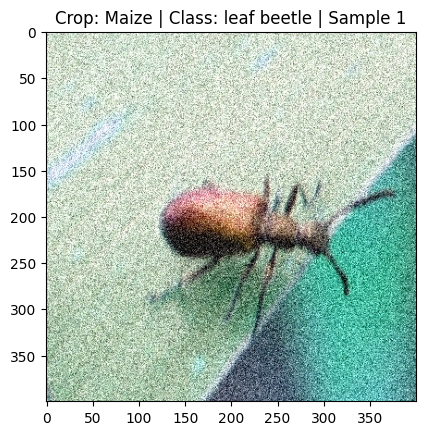

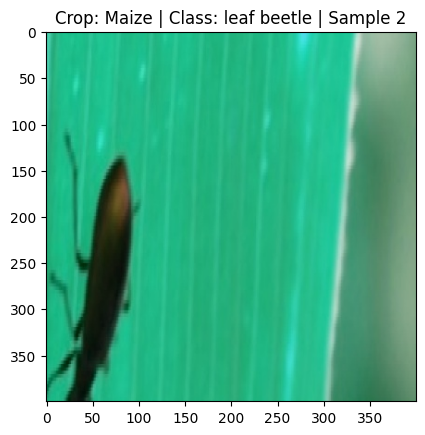

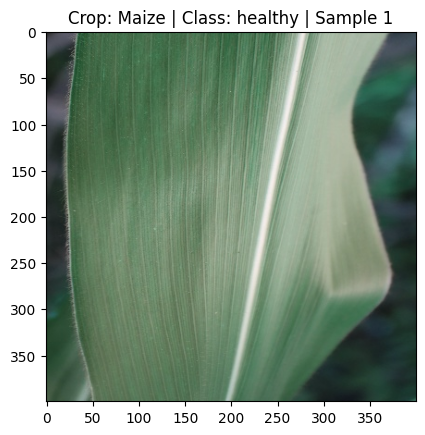

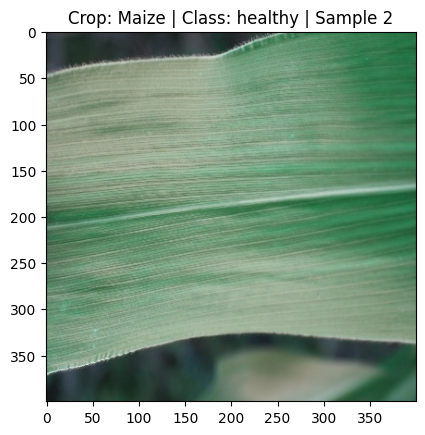

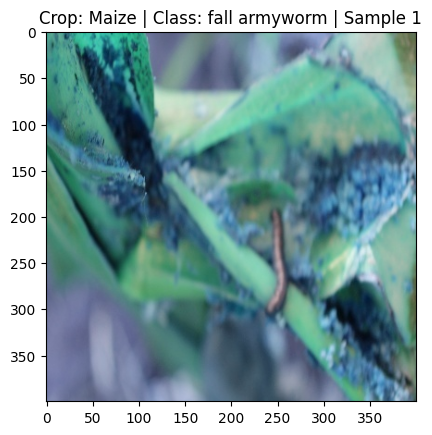

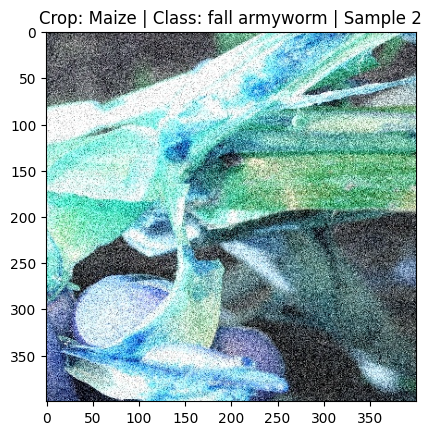

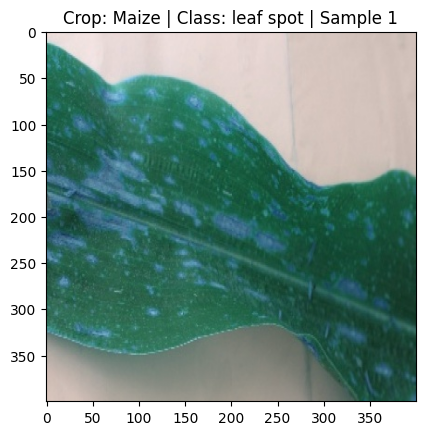

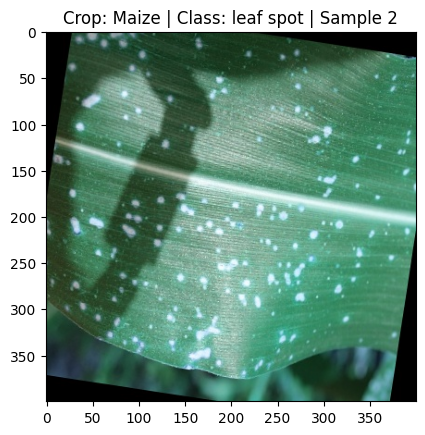

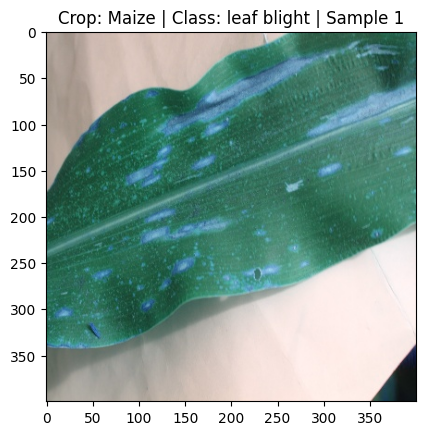

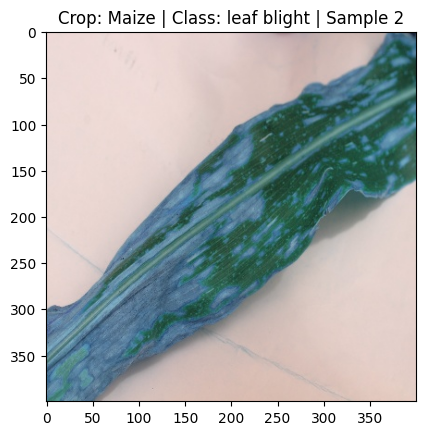

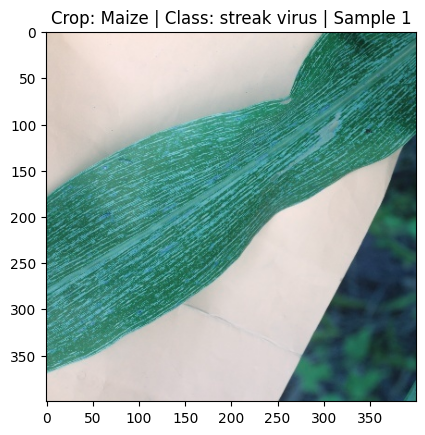

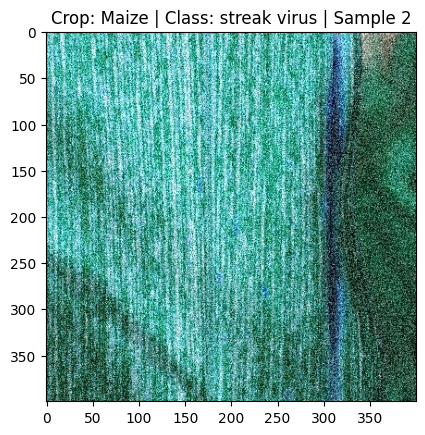

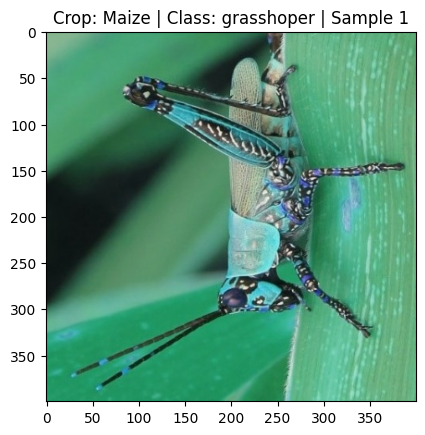

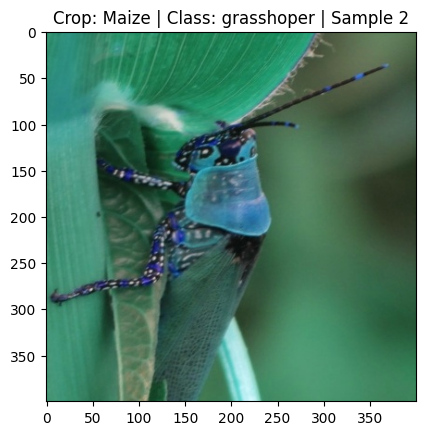

In [5]:
# Plot sample few images
for crop in crops:
    for crop_class in crop_classes[crop]:
        for i in range(2):
            img = cv2.imread(
                os.path.join(path, df[(df["crop"] == crop) & (df["set"] == "train_set") & (df["crop_class"] == crop_class)]["file"].iloc[i])
            )

            plt.imshow(img)
            plt.title(f"Crop: {crop} | Class: {crop_class} | Sample {i + 1}")
            plt.show()